# Lab 5: Clustering
---

## What is clustering?



In the previous sessions, we used machine learning techniques on a problem where the ground truth was known for each item in the dataset. The performance of the designed models could always be benchmarked by comparing the predicted class labels or regression values with the ground truth values in a held-out test set. Classification and regression are examples of *supervised* machine learning techniques.

In this session, we will explore clustering as a category of **unsupervised** machine learning. The goal of clustering is to find a natural grouping in data so that items are more similar in their features to each other than to those from different clusters.

<font color='red'>Task: Run the code below to set a number of settings, and to plot two datasets that each consist of 1000 items $\mathbf{x}^i$. </font>

In [1]:
#Run this code cell to initialize plotting and layout

#stretching over full width
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

#set up plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = [16, 8]

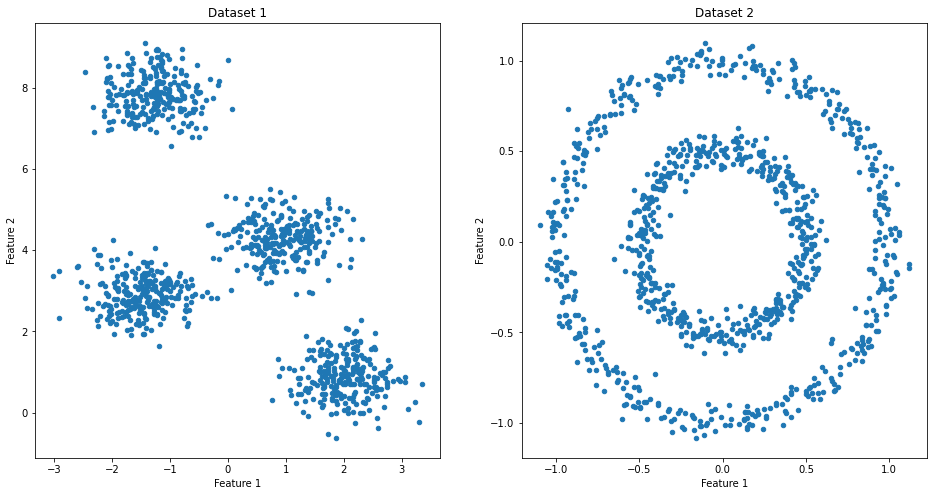

In [2]:
#Run this cell to plot two sample data sets
from sklearn.datasets import make_blobs, make_circles

k=4
dataset1, y1 = make_blobs(n_samples=1000, n_features=2,centers=4,cluster_std=0.5,shuffle=True,random_state=0)
dataset2, y2 = make_circles(n_samples=1000, factor=.5, noise=.05)
fig, (ax1, ax2) = plt.subplots(1,2);


ax1.scatter(dataset1[:,0], dataset1[:,1], s=20);
ax1.set_title('Dataset 1');
ax1.set_xlabel('Feature 1');
ax1.set_ylabel('Feature 2');

ax2.scatter(dataset2[:,0], dataset2[:,1], s=20);
ax2.set_title('Dataset 2');
ax2.set_xlabel('Feature 1');
ax2.set_ylabel('Feature 2');



In both datasets, the items have 2 features, so we can plot the items in two dimensions. In each dataset you will discern a distinct number of clusters. In this lab, we will study two algorithms to find such groups of related data in a dataset. Clustering involves two questions:
* How many clusters are there?
* To which cluster belongs an individual item?

## What are applications of clustering?



* **Hypothesis development**: Suppose that your clustering algorithm discovers four groups in your dataset. This sparks the question of *why*. There *has* to be a reason and it is the task of the data scientist to find it. You can study multiple representatives of the same cluster to figure out what they have in common, or look at pairs of items from different clusters and identify why they are different.
* **Anomaly detection**: Elements that lie really far away from their assigned cluster center don't really fit well in their cluster, but don't fit better anywhere else. These are candidates to be outliers.  Also suspicious are small clusters whose centers lie unusally far from all the other cluster centers.
<img src="images/anomalydetection.png" width="400"  />
* **Recommendation**: Clustering allows you to group e.g. products, songs or movies based on their features. This is the basis of a recommendation engine. For instance, Spotify gives a number of features for songs, such as danceability, duration, etc. (full list: [click here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)). You can cluster songs based on these features. Then, you look at the songs liked by that person, see in which cluster(s) these songs are and recommend songs from the same cluster.
* **Customer profiling**: A company can cluster its customers based on features such as demographic information, products purchased, etc. The company can then use targetted advertising to each group, or discover small clusters that may indicate a niche in the market.


## Distance metric



The goal of a clustering algorithm is to group data based upon similarity. Hence, you need to define how to measure similarity between two points $\mathbf{x}$ and $\mathbf{y}$ with a *distance function* $d$: 
$$
d\left(\mathbf{x},\mathbf{y} \right)
$$

A commonly used distance function for clustering samples with continuous features is the squared Euclidean distance between two points $\mathbf{x}$ and $\mathbf{y}$ in m-dimensional space:
$$
 d\left(\mathbf{x},\mathbf{y} \right) = \left\lVert \mathbf{x} - \mathbf{y} \right\rVert_2^2 = \sum_{i=1}^m\left(x_i - y_i \right)^2
$$

---
**Always use a distance metric which accurately reflects the similarities that you are looking to find. The choice of clustering algorithms is usually much less important than the distance measure.**

---

# Prototype-based Clustering: k-means
---

The k-means algorithm belongs to the category of **prototype-based clustering**. We will study two more categories of clustering, density-based clustering and hierarchical clustering, later in this session. Graph-based clustering (such as spectral clustering) also exists, but is not studied in this notebook.

Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features. While k-means is very good at identifying clusters with a spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, $k$, a priori. An inappropriate choice for $k$ can result in poor clustering performance. Later in this session, we will discuss the elbow method and silhouette plots, which are useful techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters $k$.



## The algorithm

The algorithm tries to find $k$ cluster centers $\mathbf{c}^j$ and can be summarized as follows:

1. Randomly pick $k$ centroids (cluster centers) $\mathbf{c}^j$ from the sample points $\mathbf{x}^i$ as initial cluster centers.
2. Assign each sample $\mathbf{x}^i$ to the nearest centroid $\mathbf{c}^j$. Otherwise stated, we calculate $b^{(i,j)}$, a binary value that indicates if $\mathbf{x}^i$ is closest to $\mathbf{c}^j$: 
$$ b^{(i,j)} = 
\begin{cases}
1  & \text{if $j = \underset{k}{\operatorname{argmin}\,} d\left(\mathbf{x}^i,\mathbf{c}^k\right)$} \\
0 & \text{otherwise}
\end{cases}
$$ 
3. Compute a better estimate of the cluster centers by calculating the centroid of all points assigned to the cluster. For cluster $j$, the new centroid $\mathbf{c}^{j\prime}$ is the point $\mathbf{c}$ that minimizes the within-cluster distance:
$$
\mathbf{c}^{j\prime} = \underset{\mathbf{c}}{\operatorname{argmin}\,} \sum_{i=1}^n b^{(i,j)} d\left(\mathbf{x}^i,\mathbf{c}^j \right) = \underset{\mathbf{c}}{\operatorname{argmin}\,} \sum_{i=1}^n b^{(i,j)} \sum_{p=1}^m\left(x_p^i - c_p^j \right)^2
$$

4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

The k-means procedure does not necessarily terminate with the best possible set of $k$ centers and might stop at a local optimum. Therefore, one typically repeats the algorithm with different initial random initializations and accept the best overall clustering.

The figure below, taken from Skiena et al., presents an animation of k-means in action. The stars indicate the cluster centers used in the current iteration. The initial guesses for the cluster centers are truly bad, and the initial assignments of points to
centers splits the real clusters instead of respecting them. But the situation rapidly improves, with the centroids drifting into positions that separates the points in the desired way.

<img src="images/k_means_algo.png" width="700" align="center">

## Scikit-learn implementation

<font color=red>Task: Run the code cell below to generate a dataset.</font>

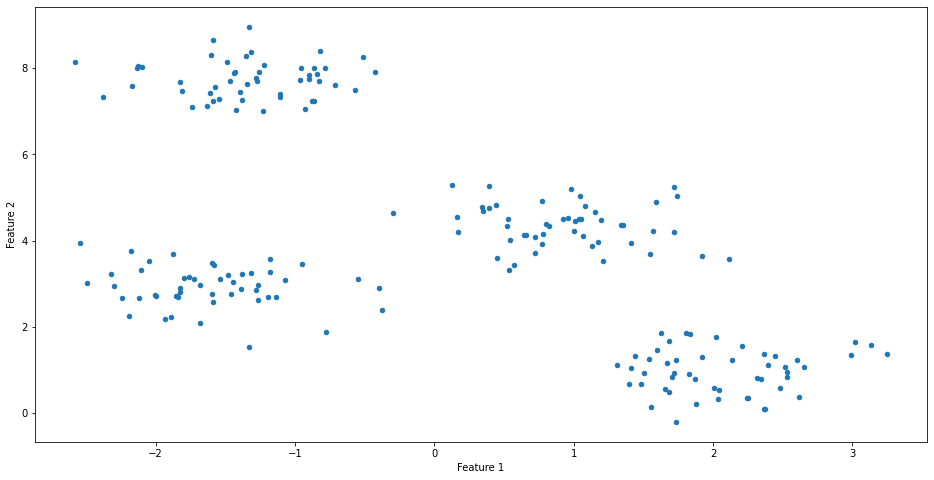

In [3]:
#Run this cell to generate data
from sklearn.datasets import make_blobs
k=4 
X, y = make_blobs(n_samples=k*50, n_features=2,centers=k,cluster_std=0.5,shuffle=True,random_state=0);
plt.scatter(X[:,0], X[:,1], s=20);
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.show();


The data is in the variable X, which is a Numpy array of tuples.

<font color=red>Task: Print out the size of the array and the first 10 elements.</font>

In [4]:
no_elements_shown = 5
print('Total no. of elements:',X.size)
print('First',no_elements_shown,'elements of array:\n',X[:no_elements_shown])

Total no. of elements: 400
First 5 elements of array:
 [[ 2.20438661  1.56085661]
 [-1.13374003  2.68467271]
 [ 1.06498315  4.10289686]
 [-2.37603789  7.32420659]
 [ 1.68289011  0.48444439]]


Obviously, there is an implementation of the k-means algorithm available in SciKit-learn. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

<font color=red>Task: Calculate the predicted labels (between 1 and $k$) for each element in the array $X$ by using the **fit_predict** method. Use the function 'plotCluster2D', defined below, to plot your results.

Some hints:
* You will notice that you need to specify the number of clusters $k$ as an argument. This is a drawback of k-means: you need to determine the number of clusters upfront. For this data, $k$ is quite obvious. We will study later some methods to determine the optimal value of $k$. 
* What happens if you use a larger or smaller number for $k$ ?
* Use 'k-means++' as initialization algorithm instead of 'random'. This is a smarter way to choose the initial clusters than purely random. 'k-means++' is the default value in the SciKit-learn implementation. 
* Use default parameters for all other values aswell.
* The function 'plotCluster2D' expects as input the dataset X, the predicted cluster for each element of X, and an array with the cluster centers. The last two arguments can be easily retrieved from the k-means implementation in Scikit-learn. 

</font>

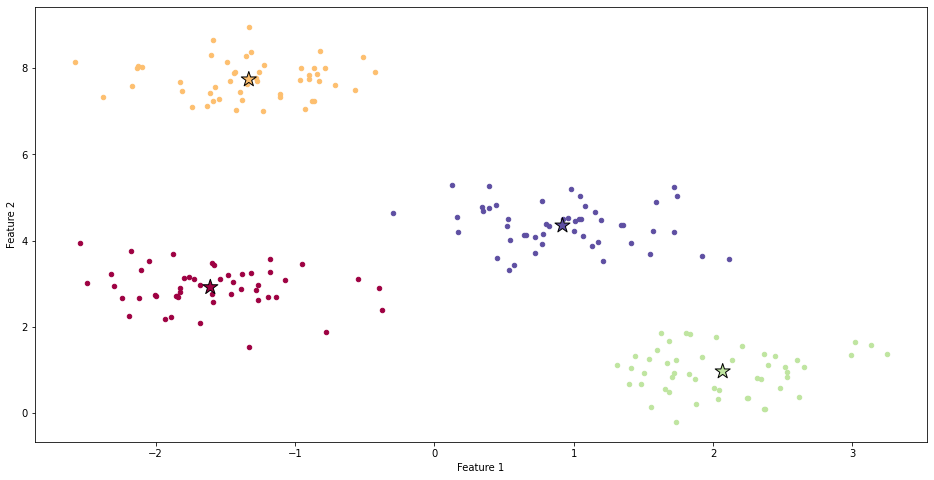

In [5]:
from sklearn.cluster import KMeans
import numpy as np

#use this function to visualize the clustering
def plotClusters2D(data, cluster_labels, cluster_centers = None):  
    '''
    This function plots the data items, using a different color per cluster. If cluster_centers are provided, these are also plotted.
    
    Args:
    *  data: Numpy array of tuples: [[item1_x, item1_y], [item2_x, item2_y] ,... ]
    * cluster_labels: an array of integers containing the cluster number for each data item: 
    * cluster_centers: optional, an array of tuples containing the feature values of the cluster centers [[center1_x, center1_y], [center2_x,center 2_y]...]
    '''
    
    unique_labels = set(cluster_labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
          # Black used for points not assigned to a cluster (will be useful for other algorithms, k-means assigns each element to a cluster)
          col = [0, 0, 0, 1]        

        plt.scatter(data[cluster_labels == k,0],data[cluster_labels == k,1],s=20,c=[col])

    if cluster_centers is not None:
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=250, marker='*', c=colors, edgecolor='black')
  
    plt.xlabel('Feature 1') ;   
    plt.ylabel('Feature 2');
    

#complete the following code:
km = KMeans(n_clusters=4, init='k-means++')
y_km = km.fit_predict(X)
plotClusters2D(X,y_km,km.cluster_centers_)


## Finding the optimal number of k

The k-means algorithm requires the user to initialize the number of clusters $k$. Until now, we have worked with 2D data of which the number of clusters could be easily derived from visual inspection. In most cases the 'right' number of clusters is harder to estimate, e.g. because we are working with high-dimensional data that does not allow plotting. 
We will now study two  approaches to find the optimal number of $k$.

### The Elbow method


The **elbow** method is a graphical tool to estimate the optimal number of clusters $k$ for a given task. Starting from $k=2$, you perform k-means and evaluate the resulting clustering according to some evaluation metric. For instance, you could use the **cluster inertia**, also known as the sum of squared errors (SSE) as a function of k:

$$
SSE = \sum_{i=1}^n \sum_{j=1}^k  b^{(i,j)} \left\lVert \mathbf{x^i} - \mathbf{c^j} \right\rVert_2^2 
= \sum_{i=1}^n \sum_{j=1}^k \sum_{p=1}^m  b^{(i,j)} \left(x_p^i - c_p^j \right)^2
$$

<img src="images/intraclusterdistance.png">

Intuitively, the SSE should decrease for increasing values of $k$. Indeed, inserting a new center $\mathbf{c}^{k+1}$ at a random position into a previous $k$-means solution can only decrease the SSE by happening to land closer to a few of the input points $\mathbf{x}^i$ than their previous center. This creates a new cluster around $\mathbf{c}^{k+1}$, but presumably an even better clustering would have been found running by $k$-means from scratch on $(k+1)$ centers.

Instead, we seek the value $k$ where the *rate* of decline decreases because we have exceeded the number of true cluster sources. The error curve should look something like an arm in typing position: it slopes down rapidly from shoulder to elbow, and then slower from the elbow to the wrist. We want $k$ to be located exactly at the elbow. 

Each new cluster center adds parameters to the model. Occam's razor tells us that the simplest model is best, which is the philosophical basis for using the bend in the elbow to select $k$. There are formal criterias of merit, but these are out of scope for this session.


<font color=red>
Task: create a plot of the cluster inertia (SSE) for values of $k$ between 2 and 10. We can use the <a href="https://www.scikit-yb.org/en/latest/index.html"> yellowbrick</a> package for this, a handy machine learning visualisation library (you might have to install this package using pip install yellowbrick or conda install yellowbrick). Use the <a href="https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#elbow-method">KElbowVisualiser</a> to implement the elbow method.  Is the value of the elbow corresponding to the value you would "manually" derive from a visual inspection of the plot you made above?
</font>

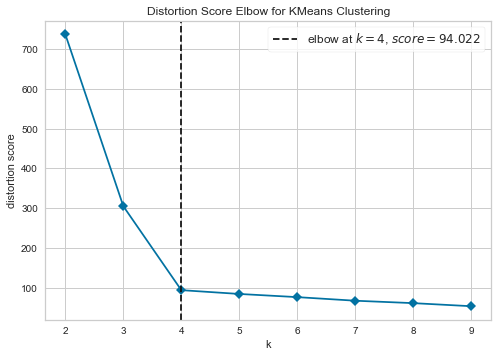

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualiser = KElbowVisualizer(model, k=(2,10), timings=False)

visualiser.fit(X)
visualiser.show()

### Silhouette analysis

Another graphical tool to evaluate the quality of clustering is **silhouette analysis**. This technique can also be applied to the result of clustering algorithms other than k-means. 

Silhouette analysis plots a measure of how tightly grouped the samples in each cluster are. To calculate the **silhouette coefficient** of a single sample $\mathbf{x}^i$, you need to apply three steps:

1. Calculate the cluster cohesion $a^i$: the average distance between $\mathbf{x}^i$ and all other points in the same cluster.
2. Calculate the cluster separation $b^i$: average distance between  $\mathbf{x}^i$ and all samples in the nearest cluster. 
3. Calculate the silhouette coefficient $s^i$ as follows:
$$
s^i = \frac{b^i - a^i}{\text{max}(b^i,a^i)}
$$

Since $b^i$ tells how dissimilar a sample is to other clusters, and $a^i$ tells us how similar it is to the other samples in its own cluster, we prefer $b^i >>> a^i$, so $s^i \approx 1$.

<font color=red>
Task: Create silhouette plots for $k=4$ and $k=2$ to see the difference between *good* and *bad* clustering. With suboptimal clustering, the silhouettes have visibly different lengths and widths.  
Again, use the yellowbrick package for this, documentation can be found <a href="https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#quick-method">here</a>
</font>

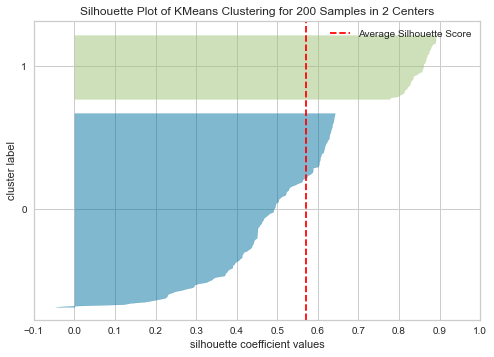

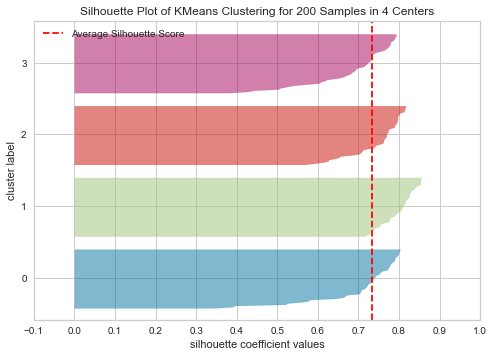

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [7]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(2), X, colors='yellowbrick')

silhouette_visualizer(KMeans(4), X,colors='yellowbrick')


## Exercise: Customer Segmentation

You are owning a supermarket and through membership cards, you have some basic data about your customers like age, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The marketing team want to understand the typical profiles of the customers, so that it can do targetted advertising. 

<font color=red>Read the CSV-file 'Mall_Customers.csv' into a Pandas dataframe. The encoding used is ISO-8859-1. Print the first 10 lines of the dataframe: what features are in the dataset? Which ones are numerical and which ones are categorical?</font>

In [8]:
import pandas as pd

df = pd.read_csv('./data/Mall_Customers.csv', encoding='ISO-8859-1')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Not all features are numerical. We will see in a later session how you can cope with non-numeric features. For now, we will apply k-means algorithms on three numeric features (which ones?)

<font color=red>Task: use the elbow method to find a good value for $k$. </font>

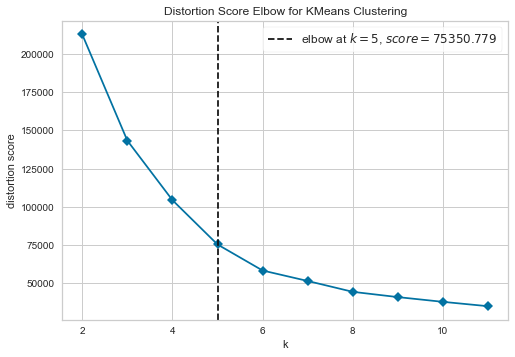

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
data = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

model = KMeans()

visualiser = KElbowVisualizer(model, k=(2,12), timings=False)

visualiser.fit(data)
visualiser.show()

<font color=red>Task: use the silhouette method to determine $k$.</font>

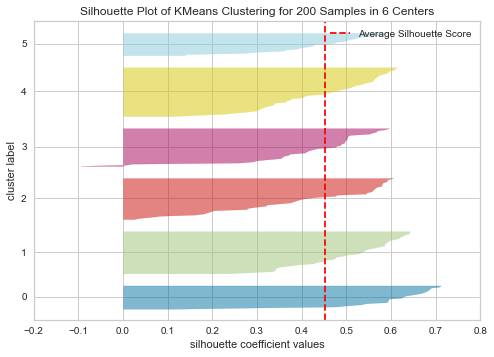

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=6))

In [10]:
silhouette_visualizer(KMeans(6), data,colors='yellowbrick')

<font color=red>Task: Visualize the clusters for the chosen value of $k$ using the method 'plotClusters3D' given below. Hint: you can rotate the graph to better inspect your clustering.</font>

In [11]:
import plotly
import plotly.graph_objs as go

# If the graph is not rendering and you are using jupyterhub, try uncommenting these lines 
# import plotly.io as pio
# pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

def plotClusters3D(X, y_km, cluster_centers = None,feature_names = ['Feature 0, Feature 1, Feature 2'],title=None):  
    '''
    This function creates a 3D plot of clustered data
    
    Args:
    * X: Numpy array of tuples: [[item1_x, item1_y], [item2_x, item2_y] ,... ]
    * y_km: the cluster number for each data item
    * cluster_centers: the coordinates of the cluster centers
    * feature_names: axis labels to be used for each of the features
    * title: title of the resulting plot
    '''
    unique_labels = set(y_km)

    fig = go.Figure()
    
    for k in unique_labels:   

        fig.add_trace(go.Scatter3d(
            x=X.loc[y_km == k,feature_names[0]],  
            y=X.loc[y_km == k,feature_names[1]],  
            z=X.loc[y_km == k,feature_names[2]],  
            mode='markers',
            marker={
                'size': 5,
                'opacity': 0.8,
            }, name=f"Cluster{k}"
        ))
        
    if cluster_centers is not None:
        fig.add_trace(go.Scatter3d(
            x=cluster_centers[:, 0],  
            y=cluster_centers[:, 1], 
            z=cluster_centers[:,2],  
            mode='markers',
            marker={
                'size': 10,
                'opacity': 0.8,
                'symbol' : 'diamond',
                'color' : 'red'
            }, name='Cluster centers'
        ))

    fig.update_layout(scene = dict(
                    xaxis_title=feature_names[0],
                    yaxis_title=feature_names[1],
                    zaxis_title=feature_names[2]),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10), title_text=title, title_x=0.5, title_y = 0.95)


    plotly.offline.iplot(fig)


#complete the following code:
km = KMeans(n_clusters=5, init='k-means++')
y_km = km.fit_predict(data)
print(km.labels_)
plotClusters3D(data,y_km,km.cluster_centers_,data.columns.values, title="KMeans clustering for customer segmentation")


[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


## The importance of normalization in k-means

Normalization is an important concept in machine learning. Let's understand why. 

<font color=red>Task: Plot the following data.</font>

Text(0.5, 1.0, 'Data (note different axes scales)')

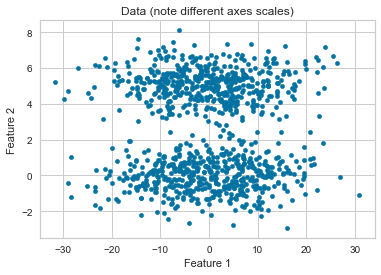

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt #changing the back-end requires to import matplotlib again
rnorm = np.random.randn
x = rnorm(1000) * 10  
y = np.concatenate([rnorm(500), rnorm(500) + 5])
data = np.column_stack((x,y))

plt.scatter(x, y,  s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data (note different axes scales)')

<font color=red>Task: Apply k-means clustering on this data and plot the result using the *plotClusters2D* method that we defined earlier in this notebook.</font>

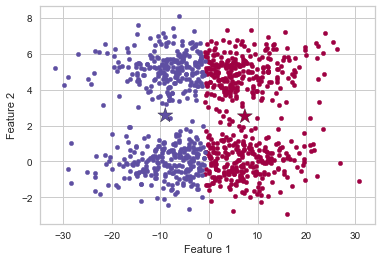

In [13]:
#complete the following code:
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(data)
plotClusters2D(data,y_km,cluster_centers=km.cluster_centers_)

Clearly, this is not the clustering you would expect. The clusters are separated by an imaginery vertical line, althought intuitively you would draw a horizontal line to split the two clusters.

To understand the origin of this problem, remember that k-means (and any clustering algorithm) uses a distance function to calculate the similarity between data points. The default implementation of the k-means algorithm uses the Euclidean distance: 

$$
 d\left(\mathbf{x},\mathbf{y} \right) = \left\lVert \mathbf{x} - \mathbf{y} \right\rVert_2^2 = \sum_{i=1}^m\left(x_i - y_i \right)^2
$$


<font color=red> Task:</font>
* <font color=red>Look again at the plot. Can you now explain why k-means has clustered along feature 1 and not feature 2?</font>
* <font color=red>Now apply standard scaling to the dataset, run k-means again and visualize the new clustering.</font>

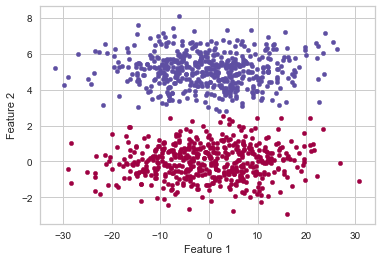

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(scaled_data)
plotClusters2D(data,y_km)

In the customer segmentation exercise, we obtained good results, although we did not normalize the data. 

<font color=red>Study the content of the dataset. Do you understand why we did not need to apply normalization?</font>

# Density-based clustering: DBScan
---

Density-based Spatial Clustering of Applications with Noise (DBSCAN) does not make assumptions about spherical clusters like k-means. Moreover, DBSCAN can identify points that are not part of any cluster and does not require you to specify the number of clusters upfront. On the other hand, DBSCAN is often somewhat slower than k-means and requires more memory and computing power.

DBSCAN assigns cluster labels based on dense regions of points. The notion of density is defined as the number of points within a specified radius $\epsilon$.

## The algorithm

According to the DBSCAN algorithm, a special label is assigned to each sample
(point) using the following criteria:
* A point is considered a core point if at least a specified number (*MinPts*) of neighboring points fall within the specified radius $\epsilon$
* A border point is a point that has fewer neighbors than *MinPts* within, but lies within the radius of a core point. 
* All other points that are neither core nor border points are considered noise points

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two simple steps:
1. Form a separate cluster for each core point or connected group of core points (core points are connected if they are no farther away than $\epsilon$ ).
2. Assign each border point to the cluster of its corresponding core point.

The figure below, taken from Raschka et al., summarizes all these concepts:

<img src="images/dbscan_algo.jpg" width="500">

Another nice visualisation is the following GIF, in which the DBSCAN algorithm is being performed on nodes in the form of a smiley.
<div>
    <img src="images/DBSCAN_smiley.gif" width="550" />
    <br/>Source: <a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">The 5 Clustering Algorithms Data Scientists Need to Know</a>
</div>


## Comparison of DBScan and K-means on a sample dataset.

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.

<font color=red>Task: Create a new dataset by running the cell below</font>

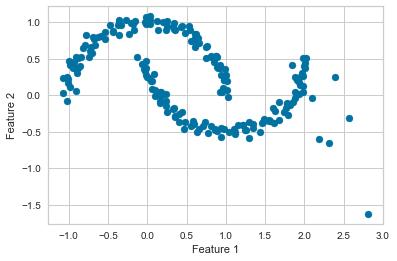

In [15]:
#Run this code cell to generate sample data
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
Z, y = make_blobs(n_samples=6,cluster_std=0.5,centers=[[2.2,-0.5]])
X = np.append(X,Z,axis=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<font color=red>Task: Run k-means clustering on this data. Determine the value of k by visual inspection of the plot above. Plot the clustered data using the 'plotCluster2D' method defined earlier.</font>

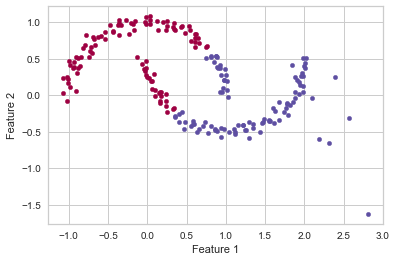

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(X)
plotClusters2D(X,y_km)

<font color=red>Task: Now also apply the DBScan algorithm on the dataset. You can find the the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Visualize the results again using the plotClusters2D. Try to find good combinations of *MinPts* and $\epsilon$ values</font>

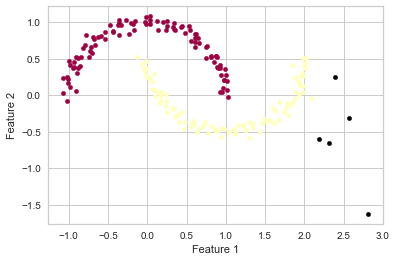

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plotClusters2D(X,y_db)

DBScan also has some disadvantages. With an increasing number of features in our dataset — assuming a fixed number of training examples — the negative effect of the curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance metric. However, the problem of the curse of dimensionality is not unique to DBSCAN; it also affects other clustering algorithms that use the Euclidean distance metric, for example, kmeans and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN ($MinPts$ and$\epsilon$) that need to be optimized to yield good clustering results. Finding a good combination of MinPts and $\epsilon$ can be problematic if the density differences in the dataset are relatively large. 

# Hierarchical clustering
---

For our last clustering algorithm we're going to take a look at hierarchical clustering. Hierarchical clustering algorithms can be divided in two categories:
- **Agglomerative or bottom up**: we treat all points as individual clusters and merge (or agglomorate) clusters until there is only one cluster left with all points
- **Divisive or top down**: We start out with one cluster that contains all the points and succesively split this cluster as we move down the hierarchy

The difference is illustrated in the image below
<div>
    <img src="images/divisive_agglomorative.jpg" width="600" />

</div>


This lab we are going to focus on agglomerative hierarchical clustering. To visualise this clustering we use tree diagrams or **dendrograms** (*déndron* = tree, *grámma*=drawing). An example of how agglomorative hierarchical clustering and the corresponding dendrogram works can be found in the GIF below. 

<div>
    <img src="images/agglomerative_hierarchical_clustering.gif" width="800" />
    <br/>Source: <a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">The 5 Clustering Algorithms Data Scientists Need to Know</a>

</div>

Our algorithm needs two distance functions. One to find the distance between two points, we call this the  **affinity**, and another to measure distance between clusters, this is called the **linkage** function.

Using these functions we can define the algorithm with the following steps:
1. Start by treating each data point as a single cluster.
2. Combine the two clusters that have the smallest linkage
3. Repeat step 2 until either we have the amount of clusters we want or the distance between the remaining clusters becomes too large


## Agglomerative clustering for customer segmentation

We'll try this new clustering technique on our customer segmentation data. As always sklearn is there to help us with a tried and tested implementation of the [agglomorative clustering algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

<font color="red"> Task: Use the agglomerative clustering algorithm on the customer segmentation data and visualise the results. Manually specify the amount of clusters for now. </font>

In [18]:
from sklearn.cluster import AgglomerativeClustering

data = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

clustering = AgglomerativeClustering(n_clusters=5).fit(data)
plotClusters3D(X=data,y_km=clustering.labels_,cluster_centers=None, feature_names=data.columns.values)

We can also generate the dendrogram using the scipy library.

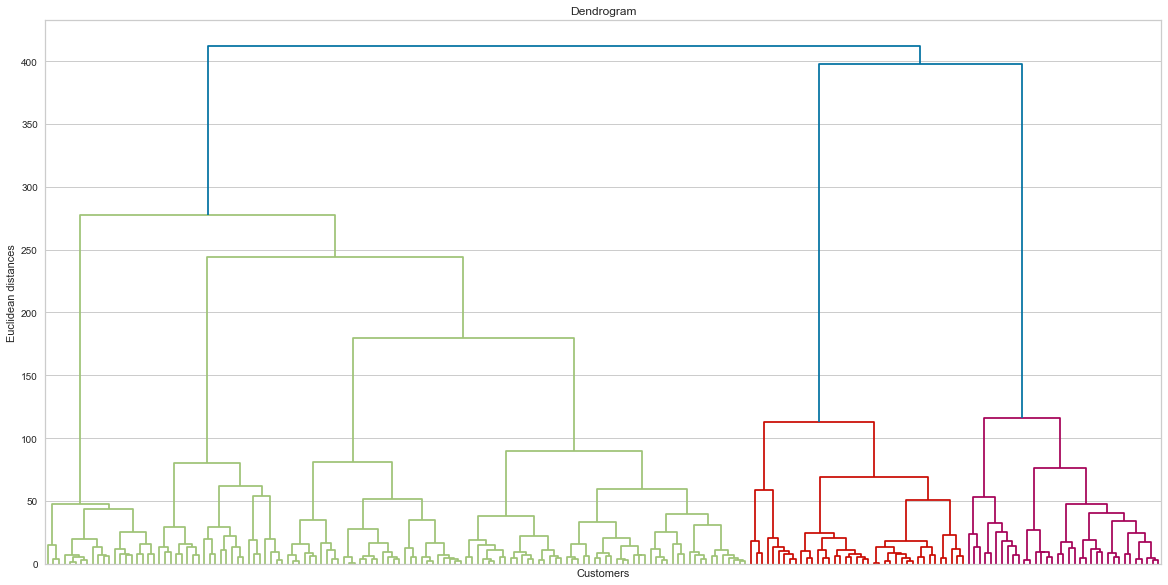

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"), show_leaf_counts=False, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<font color=red>Task analyse this dendrogram. What do you see? Use this dendrogram to find the right distance threshold to get 5 clusters. Furthermore experiment with the different hyperparameters of the model, what happens if we choose different affinity or linkage functions?</font>

In [20]:
n_clusters = None # if n_clusters is None then the model will try to agglomorate clusters until the linkage between them becomes larger than distance_threshold
distance_threshold = 185

clustering = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold).fit(data)

plotClusters3D(X=data,y_km=clustering.labels_,cluster_centers=None, feature_names=data.columns.values)

# Clustering techniques comparison
---

Finally let's try out all our techniques on the customer segmentation problem and compare the results.

<font color="red"> Task: try out the KMeans, DBSCAN and agglomerative clustering on the customer data and try to find the best clustering for each </font>

In [21]:
km = KMeans(n_clusters=5)
y_km = km.fit_predict(data)
plotClusters3D(X=data,y_km=y_km,cluster_centers=km.cluster_centers_, feature_names=data.columns.values)

In [22]:
db = DBSCAN(eps=11.5, min_samples=5, metric='euclidean')
y_db = db.fit_predict(data)
plotClusters3D(X=data,y_km=y_db,cluster_centers=None, feature_names=data.columns.values)

In [23]:
ahc = AgglomerativeClustering(n_clusters=5)
y_ahc = ahc.fit_predict(data)
plotClusters3D(X=data,y_km=y_ahc,cluster_centers=None, feature_names=data.columns.values)

Up until now we evaluated our clustering visually, there are also some metrics we can use for this, for example:

- **Silhouette score**: Measures separation distance between clusters. Value between -1 (worst score) and +1 (best score)
- **Davies-Bouldin Index**: Average similarity measure of each cluster with its most similar cluster. Minimum score is 0 with lower values indicating better clustering

<font color="red">Task: compare the results of the clustering using the silhouette score and the Davies-Bouldin Index</font>

In [24]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

print("K-means cluster\n-------------------")
print(f"Davies-Bouldin Index: {davies_bouldin_score(data, y_km)}")
print(f"Silhouette score {silhouette_score(data, y_km)}")

print("\nDBScan\n-------------------")
print(f"Davies-Bouldin Index: {davies_bouldin_score(data, y_db)}")
print(f"Silhouette score {silhouette_score(data, y_db)}")

print("\nAgglomerative hierarchical clustering\n-------------------")
print(f"Davies-Bouldin Index: {davies_bouldin_score(data, y_ahc)}")
print(f"Silhouette score {silhouette_score(data, y_ahc)}")

K-means cluster
-------------------
Davies-Bouldin Index: 0.8218781633199784
Silhouette score 0.44428597560893024

DBScan
-------------------
Davies-Bouldin Index: 1.7837674583661685
Silhouette score 0.21156364147287732

Agglomerative hierarchical clustering
-------------------
Davies-Bouldin Index: 0.8216721951598934
Silhouette score 0.4401889024290193


We have now obtained scores for all our clustering techniques and can use them for comparisons. 

<font color="red"> Task: is it a good idea to use these metrics to choose a clustering algorithm? Why or why not? </font> 

Not entirely, as DBSCan includes a cluster with all noisy points its score would automatically be worse then the others. On the other hand we can't simply ignore this cluster when calculating the score for DBScan as the other algorithms do have to deal with these noisy points. 

# Conclusions
---

We have seen three types of clustering, and more exist. In practice, it is not always obvious which clustering algorithm will perform best on a given dataset, especially if the data comes in multiple dimensions that make it hard or impossible to visualize. 

Furthermore, it is important to emphasize that a successful clustering not only depends on the algorithm and its hyperparameters. Rather, the choice of an appropriate distance metric and the use of domain knowledge that can help guide the experimental setup can be even more important.

In the context of the curse of dimensionality, it is thus common practice to apply **dimensionality reduction techniques** prior to performing clustering. Also, it is particularly common to compress datasets down to two-dimensional subspaces, which allows us to visualize the clusters and assigned labels using two-dimensional scatterplots, which are particularly helpful for evaluating the results. This will be the scope of the next session.

# References
---

The following resources have been used to construct this notebook:

* Rashka S and Mirjalili V. Python Machine Learning. Packt Publishing.
* Skiena S. The Data Science Design Manual. Springer. 2017
* Alpaydin E. Introduction to Machine Learning, 3rd edition. MIT Press. 2014
* Sagar A.  Customer segmentation using k-means clustering [online](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)
* Sharma P. Comprehensive Guide of K-means Clustering [online](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/?source=post_page-----d33964f238c3----------------------)
* Sheehan D. Clustering with Scikit with GIFs. [online](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
* Seif G. The 5 Clustering Algorithms Data Scientists Need to Know. [online](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)